## Project 2: Investigate a Dataset  (TMDb Movies Data)

**The goal of the project is making the exploratory data analysis using numpy, pandas, seaborn and matplotlib library.
The important thing is that we need to note down the questions first, that needs to be answered.
The next step would be finding by the answers for the questions by analysing the dataset.**

### Questions:
1. Most popular movies yearwise.
2. Top 3 Director with most popular movies.
3. Top 10 movies of All Time based on popularity.
4. Most profitable movies, yearwise.
5. Top 10 most profitable movie of All Time.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [50]:
df=pd.read_csv("tmdb-movies.csv")

In [51]:
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### Removing unwanted columns


In [52]:
df.drop(['homepage', 'tagline', 'keywords','overview','release_date','runtime','imdb_id','budget_adj','revenue_adj'], axis=1,inplace=True)

In [53]:
df.sample(2)

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
2877,1726,4.977955,140000000,585174222,Iron Man,Robert Downey Jr.|Terrence Howard|Jeff Bridges...,Jon Favreau,Action|Science Fiction|Adventure,Marvel Studios,6220,7.3,2008
3564,62206,0.570978,28000000,40547440,30 Minutes or Less,Jesse Eisenberg|Danny McBride|Aziz Ansari|Bian...,Ruben Fleischer,Action|Comedy|Adventure,Columbia Pictures,337,5.5,2011


### Finding Duplicate Rows

In [54]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


### Removing duplicated value

In [55]:
df.drop_duplicates(inplace=True)

### Removing Outliers where budget and revenue is 0

In [56]:
df[['budget','revenue']] = df[['budget','revenue']].replace(0,np.NAN)
df.dropna(subset=['budget', 'revenue'], inplace=True)

In [100]:
df[(df.budget==0) | (df.revenue==0)] 

,id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,profit


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   float64
 3   revenue               3854 non-null   float64
 4   original_title        3854 non-null   object 
 5   cast                  3850 non-null   object 
 6   director              3853 non-null   object 
 7   genres                3854 non-null   object 
 8   production_companies  3808 non-null   object 
 9   vote_count            3854 non-null   int64  
 10  vote_average          3854 non-null   float64
 11  release_year          3854 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


### The null values in cast, director, genre and production_companies is replace with "Unknown"

In [58]:
df.fillna("Unknown",inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   float64
 3   revenue               3854 non-null   float64
 4   original_title        3854 non-null   object 
 5   cast                  3854 non-null   object 
 6   director              3854 non-null   object 
 7   genres                3854 non-null   object 
 8   production_companies  3854 non-null   object 
 9   vote_count            3854 non-null   int64  
 10  vote_average          3854 non-null   float64
 11  release_year          3854 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


In [60]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000


In [61]:
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)

Text(0.5, 0, 'Profit in Dollar(1e9)')

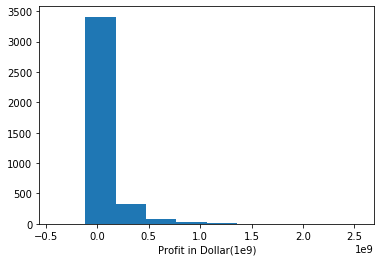

In [106]:
plt.hist(df.profit)
plt.xlabel("Profit in Dollar(1e9)")

**Note:** The plot is right skewed. And most of the movies have profit in range (0-0.5)*1e9 dollars.

Text(0.5, 0, 'popularity')

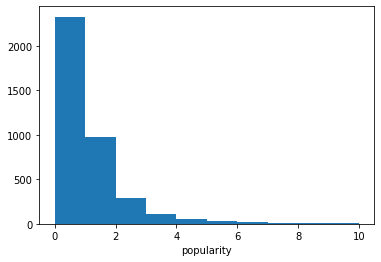

In [108]:
plt.hist(df.popularity,bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("popularity")

**Note:** The plot is right skewed. And most of the movies have popularity in range(0-2)

### Most popular movie (yearwise)
#### Method1: Without creating a function

In [64]:

li=df.groupby("release_year")["popularity"].max()
temp=pd.merge(df,li)
temp.sort_values(by=['release_year'], inplace=True)
temp[["release_year","original_title","popularity"]].reset_index(drop=True)


,release_year,original_title,popularity
0,1960,Psycho,2.610362
1,1961,One Hundred and One Dalmatians,2.631987
2,1962,Dr. No,3.170651
3,1963,From Russia With Love,2.508235
4,1964,Goldfinger,3.153791
5,1965,Thunderball,1.910465
6,1966,Who's Afraid of Virginia Woolf?,0.670274
7,1967,The Jungle Book,2.550704
8,1968,2001: A Space Odyssey,3.309196
9,1969,On Her Majesty's Secret Service,1.778746


### Method 2: Creating A General Function to Caculate yearwise solution

In [65]:
def yearwise(y):
    li=df.groupby("release_year")[y].max()
    temp=pd.merge(df,li)
    temp.sort_values(by=['release_year'], inplace=True)
    re=temp[["release_year","original_title",y]].reset_index(drop=True)
    return re

In [66]:
yearwise("popularity")

,release_year,original_title,popularity
0,1960,Psycho,2.610362
1,1961,One Hundred and One Dalmatians,2.631987
2,1962,Dr. No,3.170651
3,1963,From Russia With Love,2.508235
4,1964,Goldfinger,3.153791
5,1965,Thunderball,1.910465
6,1966,Who's Afraid of Virginia Woolf?,0.670274
7,1967,The Jungle Book,2.550704
8,1968,2001: A Space Odyssey,3.309196
9,1969,On Her Majesty's Secret Service,1.778746


### Movies with popularity > 1.368324 (which is 3rd Quartile Value) is considered among most popular movies.

In [67]:
popular=df[df.popularity > 1.368324]

In [68]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 10756
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    964 non-null    int64  
 1   popularity            964 non-null    float64
 2   budget                964 non-null    float64
 3   revenue               964 non-null    float64
 4   original_title        964 non-null    object 
 5   cast                  964 non-null    object 
 6   director              964 non-null    object 
 7   genres                964 non-null    object 
 8   production_companies  964 non-null    object 
 9   vote_count            964 non-null    int64  
 10  vote_average          964 non-null    float64
 11  release_year          964 non-null    int64  
 12  profit                964 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 105.4+ KB


### Top 3 Director with most popular movies- Steven Spielberg , Ridley Scott , Ridley Scott

In [69]:
popular.director.value_counts()

Steven Spielberg       18
Tim Burton             13
Ridley Scott           13
David Fincher          10
Martin Scorsese         9
                       ..
George Tillman, Jr.     1
Rob Schmidt             1
Michel Hazanavicius     1
Jonathan Mostow         1
Tom Tykwer              1
Name: director, Length: 524, dtype: int64

### Top 10 movies of All Time based on popularity and having vote_average >7

In [81]:
top=df[(df.popularity >1.368324) & (df.vote_average>7)].sort_values(by=['popularity'],ascending=False).reset_index(drop=True)

In [84]:
top10=(top[["original_title","release_year","popularity"]])[:10]
top10

,original_title,release_year,popularity
0,Mad Max: Fury Road,2015,28.419936
1,Interstellar,2014,24.949134
2,Guardians of the Galaxy,2014,14.311205
3,Captain America: The Winter Soldier,2014,12.971027
4,Star Wars,1977,12.037933
5,Star Wars: The Force Awakens,2015,11.173104
6,The Hobbit: The Battle of the Five Armies,2014,10.174599
7,Avatar,2009,9.432768
8,Inception,2010,9.363643
9,Furious 7,2015,9.335014


Text(0.5, 0, 'popularity')

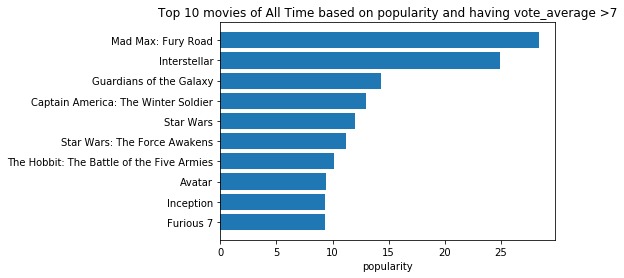

In [85]:
temp10=top10.sort_values(by=['popularity'],ascending=True)
plt.barh(temp10.original_title,temp10.popularity)
plt.title("Top 10 movies of All Time based on popularity and having vote_average >7")
plt.xlabel("popularity")


**Note:** Mad Max. Fury Road and have Interstellar have comparatively higher popularity than rest of the movies.

### Most profitable movies, yearwise
#### Method 1

In [86]:
li1=df.groupby("release_year")["profit"].max()
temp1=pd.merge(df,li1)
temp1.sort_values(by=['release_year'], inplace=True)
temp1[["release_year","original_title","profit"]].reset_index(drop=True)


,release_year,original_title,profit
0,1960,Spartacus,48000000
1,1961,One Hundred and One Dalmatians,211880014
2,1962,Dr. No,58500000
3,1963,From Russia With Love,76398765
4,1964,Goldfinger,121400000
5,1965,The Sound of Music,155014286
6,1966,Who's Afraid of Virginia Woolf?,26236689
7,1967,The Jungle Book,201843612
8,1968,2001: A Space Odyssey,44715371
9,1969,Butch Cassidy and the Sundance Kid,96308889


### Method 2: Using yearwise function

In [74]:
yearwise("profit")

,release_year,original_title,profit
0,1960,Spartacus,48000000
1,1961,One Hundred and One Dalmatians,211880014
2,1962,Dr. No,58500000
3,1963,From Russia With Love,76398765
4,1964,Goldfinger,121400000
5,1965,The Sound of Music,155014286
6,1966,Who's Afraid of Virginia Woolf?,26236689
7,1967,The Jungle Book,201843612
8,1968,2001: A Space Odyssey,44715371
9,1969,Butch Cassidy and the Sundance Kid,96308889


### Top 10 most profitable movie of All Time



In [104]:
#arranging data according to year
prof=df.sort_values(by=['profit'],ascending=False).reset_index(drop=True)[:10]
prof[["release_year","original_title","profit"]]

,release_year,original_title,profit
0,2009,Avatar,2544505847
1,2015,Star Wars: The Force Awakens,1868178225
2,1997,Titanic,1645034188
3,2015,Jurassic World,1363528810
4,2015,Furious 7,1316249360
5,2012,The Avengers,1299557910
6,2011,Harry Potter and the Deathly Hallows: Part 2,1202817822
7,2015,Avengers: Age of Ultron,1125035767
8,2013,Frozen,1124219009
9,1995,The Net,1084279658


Text(0.5, 0, 'profit In Dollar(1e9)')

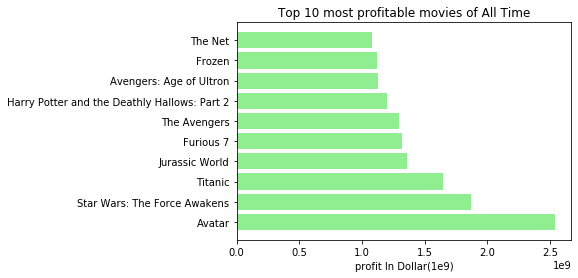

In [103]:
plt.barh(prof.original_title,prof.profit,color="lightgreen")
plt.title("Top 10 most profitable movies of All Time")
plt.xlabel("profit In Dollar(1e9)")


**Note:** Avatar made highest exceptional profit.

In [97]:
df[["popularity","profit","vote_average","budget","revenue"]].corr()

,popularity,profit,vote_average,budget,revenue
popularity,1.000000,0.596201,0.317866,0.446987,0.615535
profit,0.596201,1.000000,0.259435,0.526818,0.979133
vote_average,0.317866,0.259435,1.000000,0.024169,0.227123
budget,0.446987,0.526818,0.024169,1.000000,0.688556
revenue,0.615535,0.979133,0.227123,0.688556,1.000000


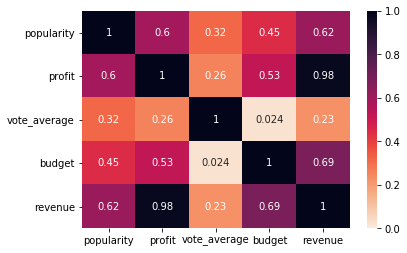

In [101]:
sb.heatmap(df[["popularity","profit","vote_average","budget","revenue"]].corr(),cmap='rocket_r',annot=True,vmin=0)

#Moderate correlation between popularity and revenue & profit
#Strong correlation betwwen revenue and profit
#Moderate correlation between budget and profit

### Conclusions
#### 1. Based on correlation
**Moderate correlation between popularity and revenue & profit:** Generally movies with high popularity generate more revenue and profit. <br>
**Strong correlation betwwen revenue and profit:** Movies that generate more revenue, makes more profit<br> 
**Moderate correlation between budget and profit:** Movies which high budget are more likely to make more profit<br>

#### 2. Based on observation
<b>1. Steven Spielberg , Ridley Scott , Ridley Scott</b> are top 3 Director with most popular movies of all time. <br> 
<b>2. Mad Max: Fury Road</b> is the most popular movie of all time based on popularity and average vote.<br>
<b>3. Avatar</b> is the most profitable movie of all time<br>

### Limitations
**1**. The movies data is from year 1960 to 2015, and all the conclusion is based according to it, thus missing recent movies.<br>**2**. There were movies with 0 revenue and budget, those movie names are removed. Therefore there popularity is not considered.
    